## **Udacity: Introduction to TensorFlow for Deep Learning**

**Lesson 8**

This lessons was an introduction to time series analysis, in particular time series forecasting.

Concepts introduced
- Definition of time series
- Application and patterns in time series
- Data Spliting approach and model training practices
- Model performance metrics for time series.
- Forecasting approaches for time series data
  - Naive forecasting approach
  - Forecasting using moving average
  - Differencing to get rid of noise in moving average forecast
  - Differencing with trailing and centered windows



## **Introduction to Time Series**

**Definiton**   
A time series is an orderd sequence of values spaced over units of time (seconds, minutes, hours, days, ...)

Time series can be
- **Univariate**: These time series have a single value at each time step
- **Multivariate**: These time series have multiple values at each time step

<br/>

Examples of time series include
- Stock prices
- Weather forecast
- Historical trends
- Audio samples (multivariate if it includes audio samples from different sources e.g stereo audio samples with left and right sources)
- GPS position (multivariate with longitude and latitude at each step)

## **Application of Time Series Analysis**

**Forecasting**   
The most well known application of time series analysis is predicting the future. This is commonly used in weather forecast to predict the weather.  Applications of time series analysis goes beyond predicting the future.

<br/>

**Imputation**   
Time series can be analysed to predict the past. This process is called imputation. Applications of this includes,
- filling in missing or corrupted parts of a time series

<br/>

**Anomaly detection**   
Through careful analysis of a time series, common patterns can be analysed and predicted. This allows for the detection of an anomaly in the time series. Example scenario: Monitoring web traffic on a specific website.

<br/>

The application listed above is not an exhaustive list. There are further applications of time series, for example they can be analysed to understand the underlying process of the time series being investigated.


## **Patterns in Time Series**

During time series analysis there are common patterns that can be seen in the series. To help analysis It would be useful to identify and isolate these individual patterns in the time series.

<br/>

**Trend Patterns**   
These are patterns showing a gradual increase/decrease in the time series. An example would be
- Increase in number of ppl going to the beach during hot days

<br/>

**Seasonality Patterns**   
These are patterns that are repeated at a predictable intervals. For example
- The traffic in the day, increases during peak time and decrease after peak times

<br/>

**White noise**   
These have no general structure or established patterns in them, it's simply noise.
- The best approach for these types of series is to find the probability distribution parameters in these series. And then using those parameters to find the mean

<br/>

Generally a time series would have some combinations of the patterns listed above.

demonstrating these patterns in different time series

In [ ]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def plot_series(time, series, format='-', start=0, end=None, label=None):
  """Plots a time series on a graph.
  Args
    - time (1d array): contains time steps for the series
    - series (1d array): contains values for the time series at each time step

  Remaining args are formating options
  """
  plt.plot(time[start:end], series[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Value")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)
  

### **Trend Patterns**

A gradual increase or decrease in time series

In [ ]:
def trend(time, slope=0):
  """Function returns a time series with the specified slope."""
  return slope*time


In [ ]:
# define a time series
time = np.arange(4*365 + 1)

print(time)

[   0    1    2 ... 1458 1459 1460]


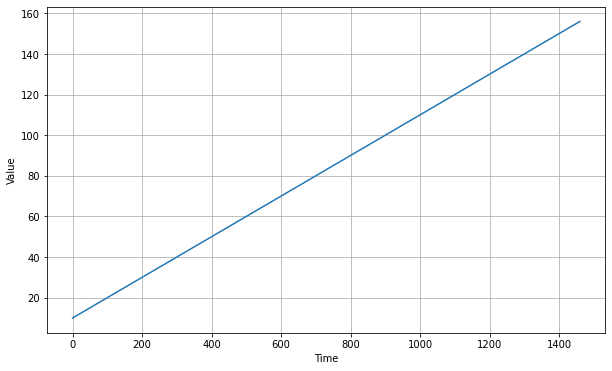

In [ ]:
# create a simple time series with a linear trend
baseline = 10
trend_series = baseline + trend(time, 0.1)

# plot the trend pattern
plt.figure(figsize=(10, 6))
plot_series(time, trend_series)
plt.show()



### **Seasonality Patterns**

In [ ]:
def seasonal_pattern(time_step):
  """Returns the output of a trig operation."""
  return np.where(time_step < 0.4,
                  np.cos(time_step * 2 * np.pi),
                  1 / np.exp(3 * time_step))
  

def seasonality(time, period, amplitude, phase=0):
  """Creates a seasonality pattern.
  Args:
    - time (1d array): containing the time steps for the time series
    - period (integar): frequency at which the seasonal patterns repeats
    - amplitude (integar): max value for the pattern
    - phase (integar): offset from the origin
  """
  season_time = ((time + phase) % period) / period
  print(season_time)
  return amplitude * seasonal_pattern(season_time)
  

[0.    0.005 0.01  ... 0.29  0.295 0.3  ]


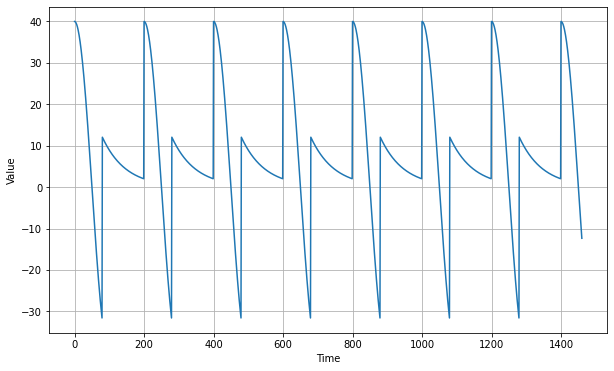

In [ ]:
# display a time series with a seasonal pattern
amplitude = 40
series = seasonality(time, period=200, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()


[0.    0.005 0.01  ... 0.29  0.295 0.3  ]


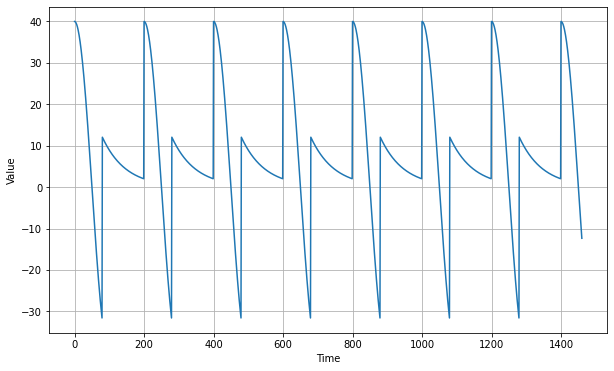

In [ ]:
# Understanding phase
amplitude = 40
series = seasonality(time, period=200, amplitude=amplitude, phase=200)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()


😕 it does not seem to be any different from what it was before

**Time series with both trend and seasonality**

[0.    0.005 0.01  ... 0.29  0.295 0.3  ]


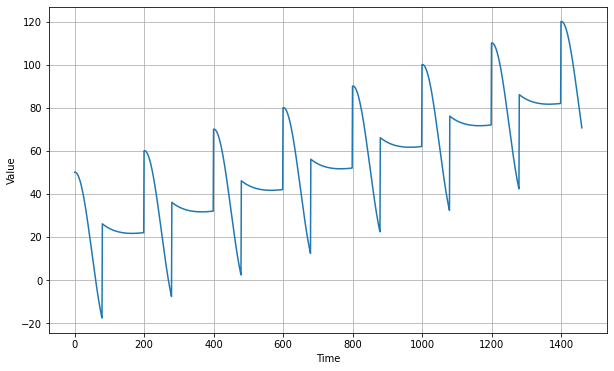

In [ ]:
# create a time series with an upwards trend and seasonality
slope = 0.05
series = baseline + trend(time, slope) + seasonality(time, period=200,
                                                    amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()


### **White noise**


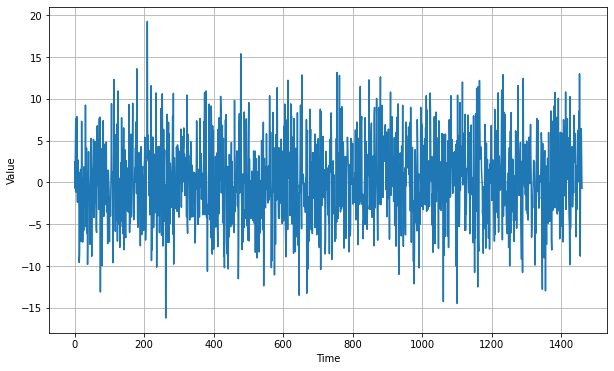

In [ ]:
# define a time series with white noise

def white_noise(time, noise_level=1, seed=None):
  """Function returns a series with white noise."""
  rnd = np.random.RandomState(seed)
  return rnd.randn(len(time)) * noise_level

noise_level = 5
noise = white_noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, noise)
plt.show()


In reality noise is correlated to the value in the previous time step

### **Combination of trend, seasonality and noise**

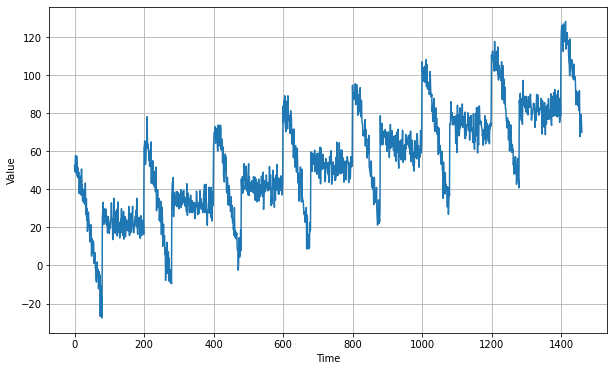

In [ ]:
series += noise

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

## **Model Training Practises For Time series**

The standard model training practises can be applied for time series analysis. The time series would be split into a training, validation and test set. With the model trained on the training set, it's performance measured against the validation set and then it's finally evaluated on the test set.

<br/>

**Representative datasets**
- Usually the test set contains the most recent time periods, before the test set is the validation set and before the validation set is the training set.
- For time series with repeating patterns, each set need to contain these seasonal patterns.

<br/>

**Final training using all the dataset including the test set**
- The most recent period contains the most useful amount of information to predict the future.
- Hence it's helpful to train the final model on all datasets including the test set.
- Note that towards selecting the final model the model would be trained and tuned using the training and validation set.

<br/>

Aside from spliting the time series from training -> validation -> test set, with fixed partitions there's another way using roll-forward partition. The general idea behind this approach is to further split the training set and training the model with the size of the training set gradually increasing.
   
It's a bit complicated and not used in this course but it's good to know.

## **Model Metric**

This is going to be a long collab notebook 😆 😆 please bear with me. The metrics used to evaluate a time series forecast are listed below.

**Mean Absolute Error (MAE)**
- Useful if you do not want to penealise large errors 

<br/>

**Mean Squared Error (MSE)**
- Penalises large errors in model prediction

<br/>

**Root Mean Squared Error (RMSE)**   
- This is the same as the MSE but is scaled to the same unit as the time series.

<br/>

**Mean Absolute Percentage Error (MAPE)**
- Measure mean ratio between absolute error and absolute value.
- It is useful in giving an idea of the size of an error compared to a value.

## **Forecasting Approaches**

**Recap** that forecasting is the act of predicting the next values in the time series. This section would go over the different ways to perform time series forecasting.

### **Naive Forecasting**   
This approach to forecasting makes prediction by using the last value.

<br/>

*Side note*   
This sounds insane to me, surely if you are always using the last value to predict the next value, you would just have a constant value. It might be that there is something that i'm missing and i need to check on.

In [ ]:
# for my sanity, make a copy of the above time series.
OG_series = series
Period = 200



Split the time series into a training and validation set

In [ ]:
split_time = 1000

# train period. 0 - 1000
time_train = time[:split_time]
x_train = series[:split_time]

# validation period. 1000: end
time_valid = time[split_time:]
x_valid = series[split_time:]


Naive forecasting

In [ ]:
# forecast only on validation period from 999 - (end-1)
naive_forecast = series[split_time -1: -1]



So in making the above prediction, the lesson instructor copied use the full time series to make his naive forecast 🙄. I guess it would work in that sence

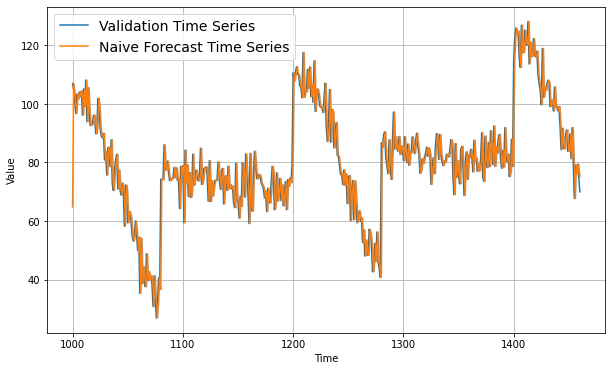

In [ ]:
# Plot the validation time series and the naive forecast, which is just the same time series offset by 1
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, label='Validation Time Series')
plot_series(time_valid, naive_forecast, label='Naive Forecast Time Series')
plt.show()


Closer look at the above plot

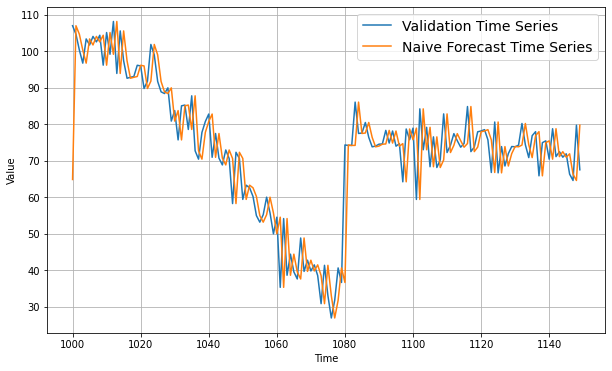

In [ ]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, start=0, end=150, label='Validation Time Series')
plot_series(time_valid, naive_forecast, start=0, end=150, label='Naive Forecast Time Series')
plt.show()


clearly it's just the same data offset by 1 🙄

**Naive Forecast MAE**

In [ ]:
# Calculate the Naive forecast MAE

errors = naive_forecast - x_valid
abs_errors = np.abs(errors)
mae = abs_errors.mean()

print('Naive Forecast MAE is {:.2f}'.format(mae))


Naive Forecast MAE is 6.10


### **Moving Average Forecasting**

This approach makes prediction by taking the mean of the past n values. This seems to be a better approach on paper than simply offseting the data.

**benefits**
- It eliminates a lot of the noise in the dataset

**Drawback**
- This approach does not anticipate trend or seaonality in the time series

In [ ]:
# Standard moving average

# Define a function to calculate the moving average for each time step
def moving_average_forecast(series, window_size):
  """Forecast the mean of the values iwithin the window size."""
  forecast = []
  for time in range(len(series) - window_size):
    forecast.append(series[time:time+window_size].mean())
  return np.array(forecast)


# test using a generic series
A = np.arange(0, 10, 1)
A_moving_average = moving_average_forecast(A, 2)

print('Test time series: ', A)
print('Moving average for test time series: ', A_moving_average)


Test time series:  [0 1 2 3 4 5 6 7 8 9]
Moving average for test time series:  [0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5]


In [ ]:
# better moving average function 
def moving_average_forecast(series, window_size):
  """Forecast the mean of the values within the window size."""
  cumulative_sum = np.cumsum(series)
  cumulative_sum[window_size:] = cumulative_sum[window_size:] - cumulative_sum[:-window_size]
  return cumulative_sum[window_size - 1:-1] / window_size
  

Apply moving average onto our time series with a window size of 30 days and then plot the final results

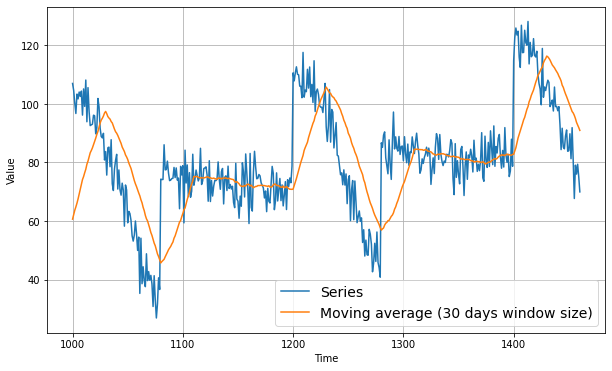

In [ ]:
# get the moving average for the validation period
# [split_time - 30:] slice was taken to get the values for the windowsize

window_size = 30
moving_avg = moving_average_forecast(series, window_size)[split_time - window_size: ]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, label="Series")
plot_series(time_valid, moving_avg,  label='Moving average (30 days window size)')


In [ ]:
# calculate the MAE for the basic moving average forecast

import tensorflow.keras as keras

print(keras.__version__)


2.7.0


In [ ]:
# calculate the moving average MAE
moving_average_mae = keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy()
print(moving_average_mae)


12.190610144958876


Comparing the results of using the moving_average method with the naive_forecast method, we can see that the naive forecast method performs much more better than the basic moving average.

The results are much more smoother, but it does not anticpate trends and seasonality. So we need to use differencing. We can see that there is a delay. in it's predictions.

#### **Moving Average Forecasting with Differencing**

Solution to the above drawback would be to remove the trends and seasonality within the time series. One approach is 

**Differencing**
- This finds the difference between repeating periods in the time series.
- For example if the time series repeats every 7 days. Using this approach we would find the difference between the current day and 7 days before.
- The resulting time series would not contain any trend or seasonality.

<br/>

The moving average method is then applied to the differenced time series. To get the final forecast we would add back the values that were subtracted during differencing.

<br/>

**Smoothing both past and present values**
- We can improve on the above method by, using the moving average of the past values as opposed to adding in the raw values.


In smoothing both past and present values. **The final forecast is 
a sum of the trailing moving average of differenced series + centered moving average of past series**.

<br/>

🤯🤯🤯🤯🤯🤯🤯🤯  I'm done 

<br/>

What is the difference between
- **Trailing moving average** used for computing moving average for present value.
- **Centred moving average** used to compute moving average for past values from the last period. Only applicable to smooth past values

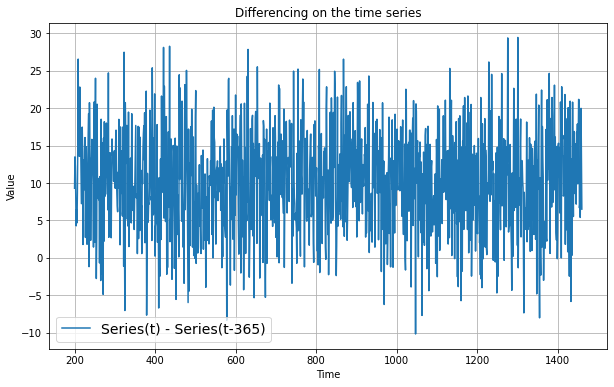

In [ ]:
# Moving average with differencing
diff_series = (series[Period:] - series[:-Period])
diff_time = time[Period:] # the time steps for the time series

plt.figure(figsize=(10, 6))
plt.title('Differencing on the time series')
plot_series(diff_time, diff_series, label="Series(t) - Series(t-365)")
plt.show()


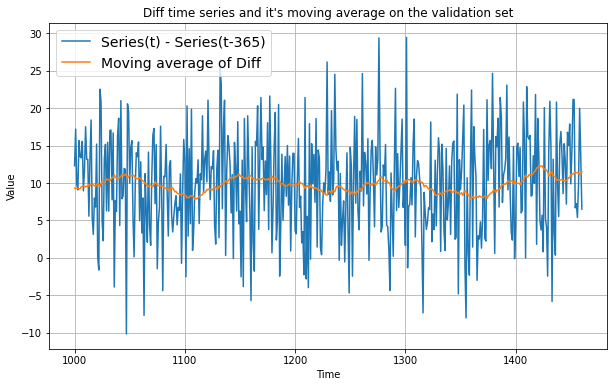

In [ ]:
# Calculate the moving average on the diff time with a window size of 50 on the validation set
Window_size = 50
diff_moving_average = moving_average_forecast(diff_series, Window_size)[split_time - Period - Window_size:]


# plot the diff time series and it's moving average
plt.figure(figsize=(10, 6))
plt.title("Diff time series and it's moving average on the validation set")
plot_series(time_valid, diff_series[split_time - Period:], label='Series(t) - Series(t-365)')
plot_series(time_valid, diff_moving_average, label='Moving average of Diff')
plt.show()


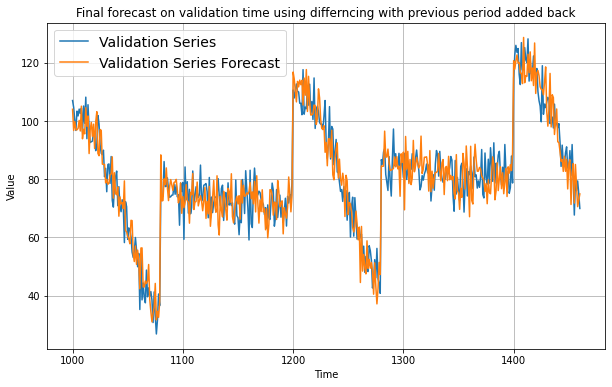

In [ ]:
# Add the diff_moving_average to the time series that was removed
final_val_forecast = diff_moving_average +  series[split_time - Period:-Period]

plt.figure(figsize=(10, 6))
plt.title('Final forecast on validation time using differncing with previous period added back')
plot_series(time_valid, series[split_time:], label='Validation Series')
plot_series(time_valid, final_val_forecast, label='Validation Series Forecast')
plt.show()


In [ ]:
# Calculate the MAE using the moving average with differencing

MAE_moving_average_with_differencing = keras.metrics.mean_absolute_error(x_valid, final_val_forecast).numpy()
print('The moving average with differencing has an MAE of {:.2f}'.format(MAE_moving_average_with_differencing))


The moving average with differencing has an MAE of 5.75


This has beat the score of the naive forecast approach. 🎊🎊🎊🎊

The resulting forecast is still really noisy. We can further improve on the results by removing the noise, the noise was added during the addition of the past period.

**Further smoothing**

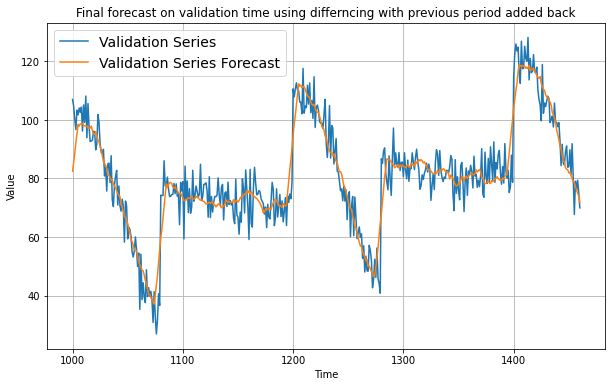

In [ ]:
# Moving average with differencing and smoothing

# the logic behind this with the subtraction is very dodgy to me, it feels like it was just adjusted by the instructor with to simply match the validation data
past_period_moving_average = moving_average_forecast(series[split_time - (Period+5): -(Period-6)], 11) + diff_moving_average


plt.figure(figsize=(10, 6))
plt.title('Final forecast on validation time using differncing with previous period added back')
plot_series(time_valid, x_valid, label='Validation Series')
plot_series(time_valid, past_period_moving_average, label='Validation Series Forecast')
plt.show()

In [ ]:
MAE_moving_average_with_differencing_and_past_period_smoothing = keras.metrics.mean_absolute_error(x_valid, past_period_moving_average).numpy()
print('The moving average with differencing has an MAE of {:.2f}'.format(MAE_moving_average_with_differencing_and_past_period_smoothing))


The moving average with differencing has an MAE of 4.96
